# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [20]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Ariel\Documents\KULIAH\Semester 5\Data mining B\W12\healthcare_dataset.csv", sep=',')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


1. Data Cleaning, Transformation

In [6]:
# Cek missing value
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Test Results'] = le.fit_transform(df['Test Results'])

columns_to_drop = ['Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Insurance Provider','Billing Amount', 'Room Number', 'Admission Type']
df = df.drop(columns=columns_to_drop, axis=1)
display(df)

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,O-,Diabetes,Aspirin,1
1,35,1,O+,Asthma,Lipitor,2
2,61,1,B-,Obesity,Lipitor,2
3,49,1,B-,Asthma,Penicillin,0
4,51,1,O-,Arthritis,Paracetamol,2
...,...,...,...,...,...,...
9995,83,1,A+,Obesity,Ibuprofen,0
9996,47,0,AB+,Arthritis,Ibuprofen,2
9997,54,1,B-,Arthritis,Ibuprofen,2
9998,84,1,A+,Arthritis,Penicillin,2


2. Visualization (EDA)

                Age        Gender  Test Results       Cluster
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      51.452200      0.492500      0.981100      0.646400
std       19.588974      0.499969      0.819762      0.778092
min       18.000000      0.000000      0.000000      0.000000
25%       35.000000      0.000000      0.000000      0.000000
50%       52.000000      0.000000      1.000000      0.000000
75%       68.000000      1.000000      2.000000      1.000000
max       85.000000      1.000000      2.000000      2.000000


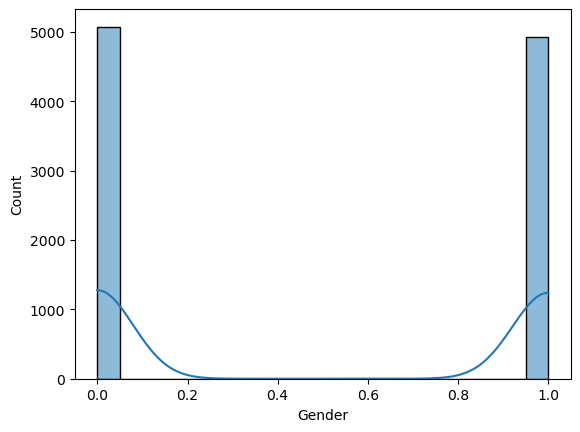

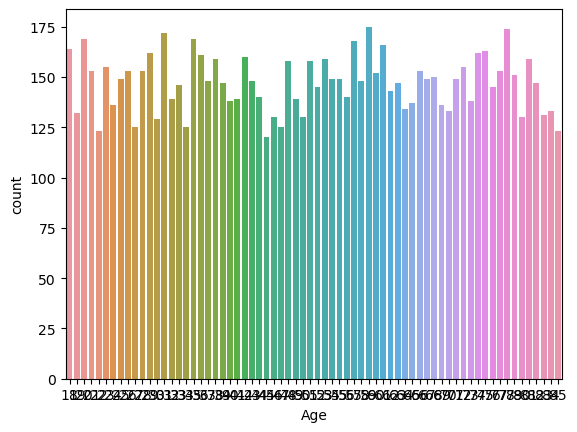

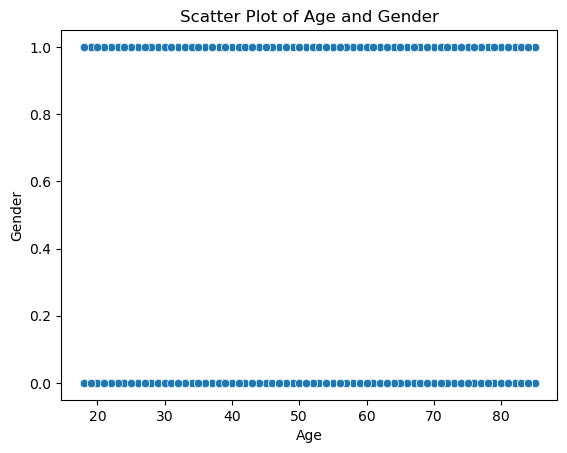

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.describe())
# Distribution Plots
sns.histplot(df['Gender'], bins=20, kde=True)
plt.show()

# Count plot for a categorical variable
sns.countplot(x='Age', data=df)
plt.show()

# Scatter plot
sns.scatterplot(x='Age', y='Gender', data=df)
plt.title('Scatter Plot of Age and Gender')
plt.show()

3. Use at least one machine learning techniques (Regression, Classification, Clustering)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import mode
import pandas as pd
import numpy as np

# Regression Task: Predict Medication
X_reg = df.drop(['Medication'], axis=1)
y_reg = df['Medication']

label_encoder = LabelEncoder()
y_reg_encoded = label_encoder.fit_transform(y_reg)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg_encoded, test_size=0.2, random_state=42)

categorical_cols_reg = ['Blood Type', 'Medical Condition']
onehot_encoder_reg = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_reg_train_encoded = pd.get_dummies(X_reg_train, columns=categorical_cols_reg)
X_reg_test_encoded = pd.get_dummies(X_reg_test, columns=categorical_cols_reg)

reg_model = LinearRegression()
reg_model.fit(X_reg_train_encoded, y_reg_train)

reg_preds = reg_model.predict(X_reg_test_encoded)

reg_r2 = r2_score(y_reg_test, reg_preds)
print(f'Regression R-squared: {reg_r2}')

# Classification Task: Classify Test Results
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

class_model = RandomForestClassifier()
class_model.fit(X_class_train, y_class_train)
class_preds = class_model.predict(X_class_test)

class_accuracy = accuracy_score(y_class_test, class_preds)
class_precision = precision_score(y_class_test, class_preds, average='weighted')
class_recall = recall_score(y_class_test, class_preds, average='weighted')

print(f'Classification Accuracy: {class_accuracy}')
print(f'Classification Precision: {class_precision}')
print(f'Classification Recall: {class_recall}')

# Clustering Task
scaled_df_hie = StandardScaler().fit_transform(df[['Age', 'Test Results']])

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = clustering.fit_predict(scaled_df_hie)

df['Cluster'] = cluster_labels

numeric_cols_cluster = df.select_dtypes(include=[int, float]).columns
categorical_cols_cluster = df.select_dtypes(include=[object]).columns

cluster_stats = df.groupby("Cluster").agg({
    "Age": "mean",
    "Gender": "mean",
    "Blood Type": lambda x: mode(x)[0][0],
    "Medical Condition": lambda x: mode(x)[0][0],
    "Medication": lambda x: mode(x)[0][0],
    "Test Results": "mean",
    "Cluster": "count"
})

cluster_stats.columns = [
    "Mean Age", 
    "Mean Gender", 
    "Mode Blood Type", 
    "Mode Medical Condition", 
    "Mode Medication", 
    "Mean Test Results", 
    "Count"
]

display(cluster_stats)


Regression R-squared: -0.0007184728769333848
Classification Accuracy: 0.3215
Classification Precision: 0.3220441886506409
Classification Recall: 0.3215


C:\Users\Ariel\AppData\Local\Temp\ipykernel_17544\1826370026.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  "Blood Type": lambda x: mode(x)[0][0],
c:\Users\Ariel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Ariel\AppData\Local\Temp\ipykernel_17544\1826370026.py:65: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https:

,Mean Age,Mean Gender,Mode Blood Type,Mode Medical Condition,Mode Medication,Mean Test Results,Count
Cluster,,,,,,,
0,56.178413,0.484317,A+,Cancer,Penicillin,1.602768,5420
1,31.247404,0.510015,O+,Hypertension,Lipitor,0.416914,2696
2,66.768577,0.490977,AB-,Asthma,Penicillin,0.000000,1884


4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

XGBoost Regression Mean Squared Error: 2.3693714255131106
XGBoost Classification Accuracy: 0.351


c:\Users\Ariel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classification Accuracy: 0.3385


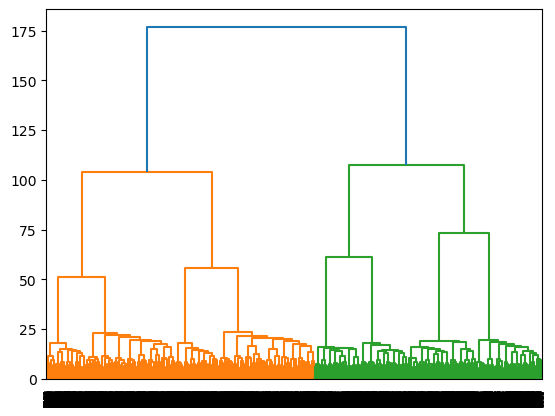

Frequent Itemsets:
   support      itemsets
0   0.2015     (Lipitor)
1   0.2079  (Penicillin)

Association Rules with Confidence >= 0.6:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


C:\Users\Ariel\AppData\Local\Temp\ipykernel_17544\2925104249.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()
c:\Users\Ariel\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori

X_reg_train_encoded = pd.get_dummies(X_reg_train, columns=['Blood Type', 'Medical Condition'])
X_reg_test_encoded = pd.get_dummies(X_reg_test, columns=['Blood Type', 'Medical Condition'])

xgb_reg_model = xgb.XGBRegressor()
xgb_reg_model.fit(X_reg_train_encoded, y_reg_train) 
xgb_reg_preds = xgb_reg_model.predict(X_reg_test_encoded)
xgb_reg_mse = mean_squared_error(y_reg_test, xgb_reg_preds)
print(f'XGBoost Regression Mean Squared Error: {xgb_reg_mse}')

xgb_class_model = xgb.XGBClassifier()
xgb_class_model.fit(X_class_train, y_class_train)
xgb_class_preds = xgb_class_model.predict(X_class_test)
xgb_class_accuracy = accuracy_score(y_class_test, xgb_class_preds)
print(f'XGBoost Classification Accuracy: {xgb_class_accuracy}')

knn_model = KNeighborsClassifier()
knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)
knn_accuracy = accuracy_score(y_class_test, knn_preds)
print(f'KNN Classification Accuracy: {knn_accuracy}')

df_encoded = pd.get_dummies(df, columns=['Blood Type', 'Medical Condition', 'Medication'])

numeric_cols = df.select_dtypes(include=[int, float]).columns
df_encoded[numeric_cols] = StandardScaler().fit_transform(df_encoded[numeric_cols])

hc_cluster = linkage(df_encoded, method='ward')
dendrogram(hc_cluster)
plt.show()

from mlxtend.frequent_patterns import apriori, association_rules

df_apriori = df[['Medication']]
df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()

df_apriori_encoded = pd.get_dummies(df_apriori['Medication'])

frequent_itemsets = apriori(df_apriori_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

rules_confidence_06 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules with Confidence >= 0.6:")
print(rules_confidence_06)